Linear Regression

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy 
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [49]:
dataset_cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1)

In [50]:
df.columns = dataset_cols
df["functional"] = (df["functional"]=="Yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


C:\Users\itzbl\AppData\Local\Temp\ipykernel_6668\3075221826.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


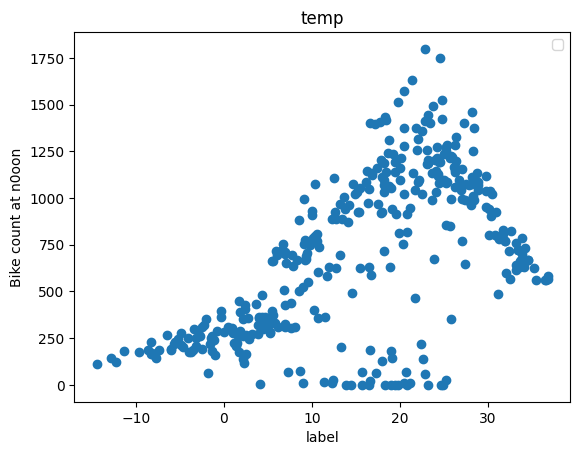

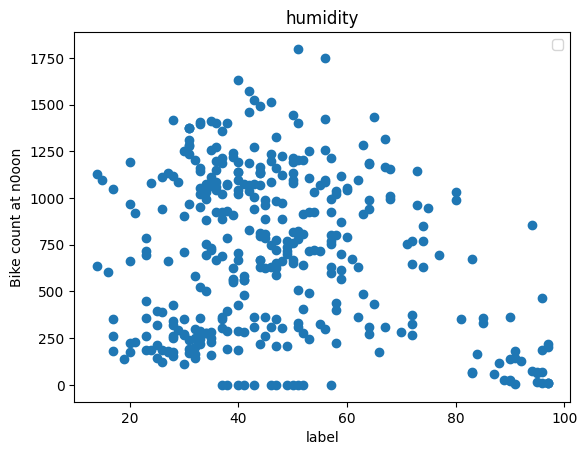

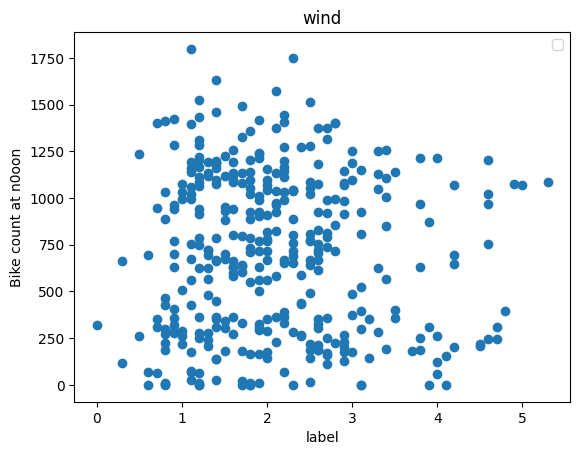

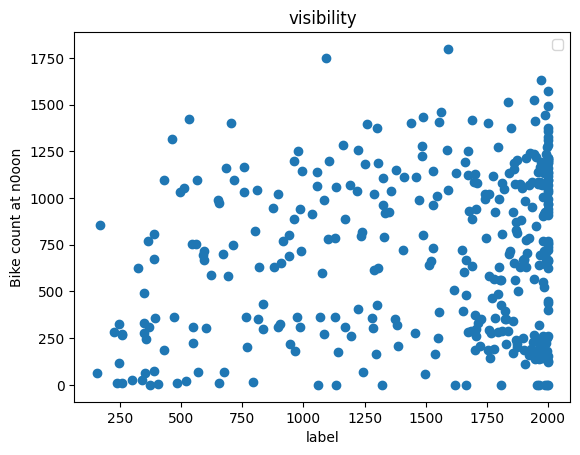

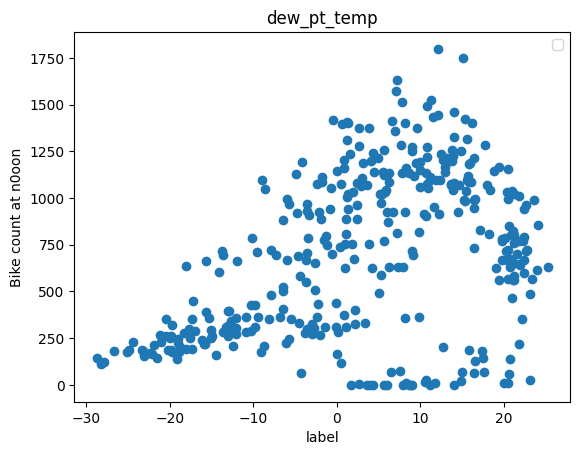

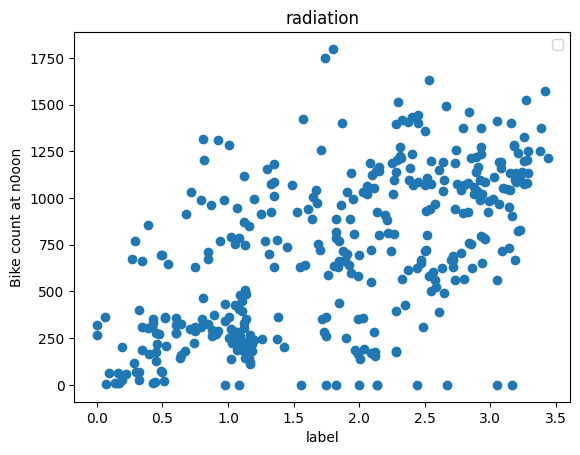

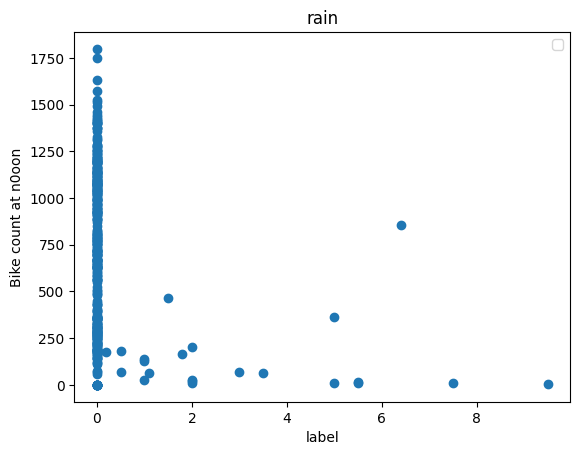

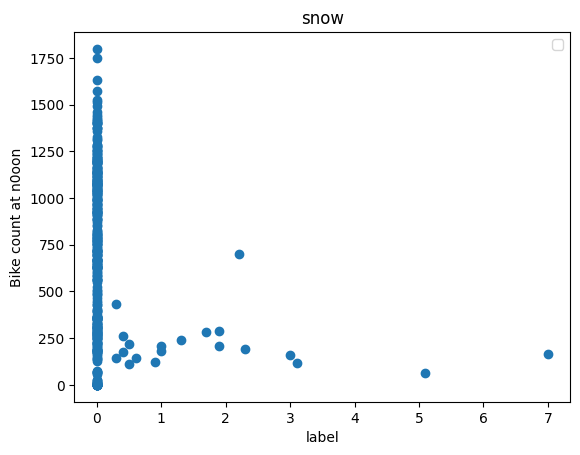

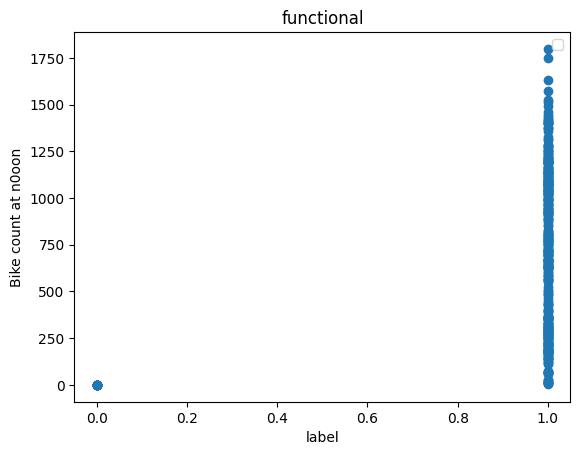

In [51]:
for label in df.columns[1:]:
    plt.scatter(df[label],df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike count at n0oon")
    plt.xlabel("label")
    plt.legend()
    plt.show()
    

In [52]:
df=df.drop(["wind","visibility","functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Train / Valid / Test dataset

In [53]:
train, val, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

d:\Python\myMachineLearning\myenv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [54]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe= copy.deepcopy(dataframe)
    
    if x_labels is None:
        x= dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
            x= dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x= dataframe[x_labels].values

    y= dataframe[y_label].values.reshape(-1,1)
    data= np.hstack((x,y))

    return data, x, y


In [55]:
_, x_train_temp , y_train_temp = get_xy(train, "bike_count",x_labels=["temp"])
_, x_val_temp , y_val_temp = get_xy(val,"bike_count",x_labels=["temp"])
_, x_test_temp, y_test_temp= get_xy(test,"bike_count",x_labels=["temp"])

In [56]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [57]:
temp_reg.score(x_test_temp,y_test_temp)

0.3903520248741732

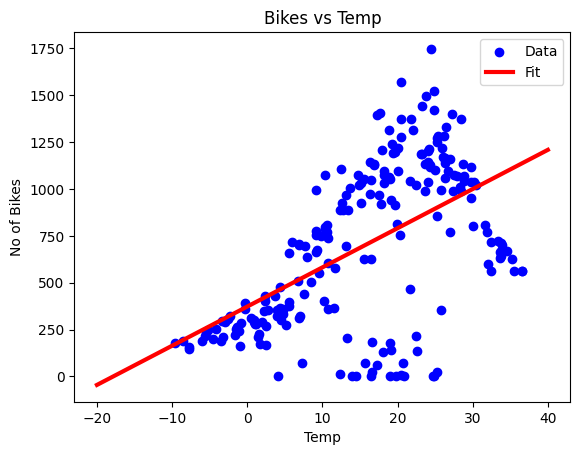

In [58]:
plt.scatter(x_train_temp,y_train_temp,label='Data',color='blue')
x= tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label='Fit',color='red',linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("No of Bikes")
plt.xlabel("Temp")
plt.show()

#Multiple Linear Regression

In [59]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [60]:
train, val, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

_, x_train_all,y_train_all= get_xy(train,"bike_count",x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(train,"bike_count",x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(train, "bike_count",x_labels=df.columns[1:])


d:\Python\myMachineLearning\myenv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [61]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [62]:
all_reg.score(x_test_all,y_test_all)

0.5003734090762667

Regression with Neural Network

In [63]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [64]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

d:\Python\myMachineLearning\myenv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
temp_nn_model= tf.keras.Sequential([
    temp_normalizer, tf.keras.layers.Dense(1)
])

In [66]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [67]:
history= temp_nn_model.fit(
    x_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp,y_val_temp)
)

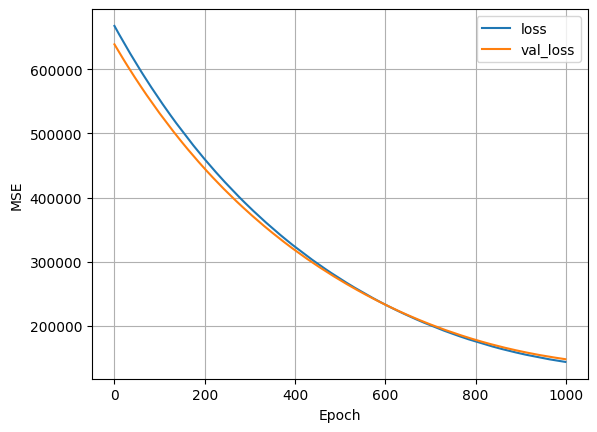

In [68]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


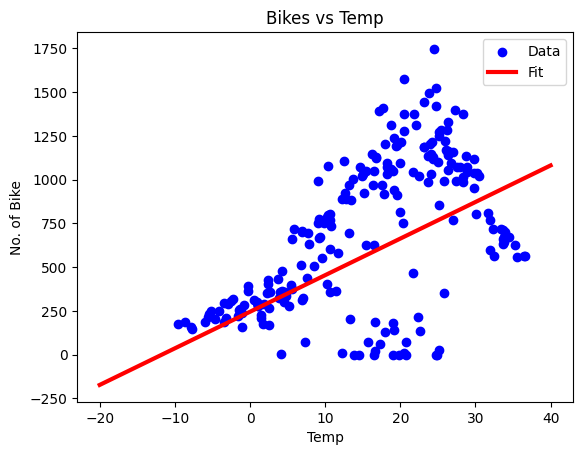

In [70]:
plt.scatter(x_train_temp,y_train_temp,label='Data',color='blue')
x= tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label='Fit',color='Red',linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("No. of Bike")
plt.xlabel("Temp")
plt.show()